In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import pandas as pd
%matplotlib inline

##Problem 4

In [72]:
data = np.loadtxt('concrete.txt')
"""Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable """
np.random.shuffle(data)
train_data = data[ : data.shape[0] * 3 / 4]
test_data = data[data.shape[0] * 3 / 4 : ]

In [135]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets.supervised import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer, RPropMinusTrainer
from pybrain.structure import FeedForwardNetwork
from pybrain.structure import LinearLayer, SigmoidLayer
from pybrain.structure import FullConnection
from pybrain.utilities           import percentError

In [158]:
eps = 0.0001
p = 10
ps = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
train_errs = []
test_errs = []

ds = SupervisedDataSet(8, 1)
for el in train_data:
    ds.addSample(el[:8], np.array([el[8],]))
test_ds = SupervisedDataSet(8, 1)
for el in test_data:
    test_ds.addSample(el[:8], np.array([el[8],]))

thetime = time()
for p in ps:
    net = buildNetwork(8, p, 1, bias=False)

    trainer = RPropMinusTrainer(net, dataset=ds, verbose=False)
    err = trainer.train()
    diff = eps + 1
    while diff > eps:
        newErr = trainer.train()
        diff = np.abs(err - newErr)
        err =  newErr
        
    print p, trainer.totalepochs, err, time() - thetime
    thetime = time()
    train_errs.append(np.mean(np.abs(net.activateOnDataset(ds) - ds['target'])))
    test_errs.append(np.mean(np.abs(net.activateOnDataset(test_ds) - test_ds['target'])))

1 2 801.533604145 1.0719230175
2 48 145.582995107 26.2202839851
3 91 77.3838899923 48.2110280991
4 191 96.9517978595 101.371469975
5 47 145.582899744 25.137139082
6 240 65.2900590843 129.667093992
7 40 145.583878788 21.4507780075
8 40 145.583214077 21.7010300159
9 43 145.582903674 22.8773369789
10 235 93.7445412109 125.880288124
11 46 145.582858181 24.3933110237
12 124 126.857167341 66.5000128746
13 43 145.58189873 22.6850678921
14 158 75.6987261446 83.8433568478
15 222 53.0632491426 117.83903718
16 36 145.583025542 19.1773078442
17 393 65.7081012608 211.444782972
18 385 73.2096306779 206.672538042
19 113 85.9933628755 60.9863829613
20 52 133.482700043 27.7266838551


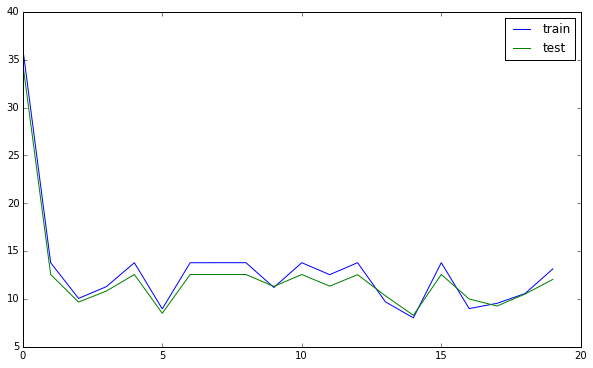

In [175]:
plt.figure(figsize=(10,6))
plt.plot(train_errs, label='train', c='b')
plt.plot(test_errs, label='test', c='g')
#plt.ylim([7,20])
plt.legend()

In [174]:
pstar = np.argmin(test_errs)
print pstar

14


In [182]:
nets = []

thetime = time()
for i in xrange(20):
    net = buildNetwork(8, pstar, 1, bias=False)

    trainer = RPropMinusTrainer(net, dataset=ds, verbose=False)
    err = trainer.train()
    diff = eps + 1
    while diff > eps:
        newErr = trainer.train()
        diff = np.abs(err - newErr)
        err =  newErr
    
    print i, trainer.totalepochs, time() - thetime
    nets.append((net, np.mean(np.abs(net.activateOnDataset(ds) - ds['target']))))

0 203 113.123198986
1 230 237.046108007
2 178 331.656867027
3 40 353.057307005
4 277 500.498523951
5 270 645.163805008
6 192 747.023926973
7 79 789.074651957
8 109 846.804157019
9 42 869.173135042
10 204 985.585272074
11 41 1010.66431904
12 145 1092.24553204
13 311 1257.94727397
14 674 1620.89717412
15 41 1642.74578595
16 289 1796.13409805
17 54 1824.95174313
18 121 1889.18098211
19 43 1912.05605292


In [186]:
randomErrs = []
for i in xrange(len(nets)):
    res = np.zeros(test_data.shape, dtype=np.float64)
    for j in xrange(i + 1):
        res += nets[j][0].activateOnDataset(test_ds)
    res /= (i+1.)
    randomErrs.append(np.mean(np.abs(res - test_ds['target'])))

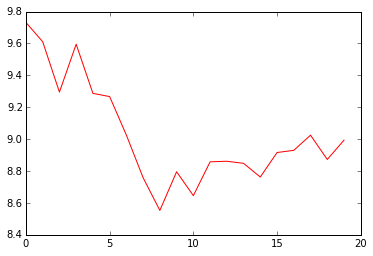

In [187]:
plt.plot(randomErrs, c='r')

In [191]:
netsSorted = sorted(nets, key = lambda x : x[1])
sortedErrs = []
for i in xrange(len(nets)):
    res = np.zeros(test_data.shape, dtype=np.float64)
    for j in xrange(i + 1):
        res += netsSorted[j][0].activateOnDataset(test_ds)
    res /= (i+1.)
    sortedErrs.append(np.mean(np.abs(res - test_ds['target'])))

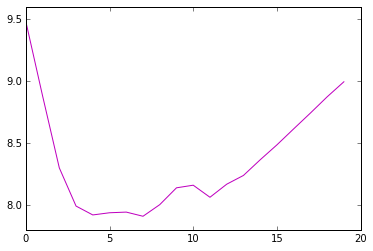

In [192]:
plt.plot(sortedErrs, c='m')

##Problem 6

In [48]:
data = []
with open('glass.dat', 'r') as inputfile:
    for line in inputfile:
        data.append(line.strip().split())

In [52]:
Rl = []
for i in xrange(1, len(data)):
    Rl.append(data[i][1])
Rl = np.array(Rl, dtype=np.float64)

In [57]:
a = np.min(Rl)
b = np.max(Rl)
n = Rl.shape[0]
print a,b,n

-6.85 15.93 214


In [118]:
hs = [0.0000025, 0.000005, 0.00001, 0.0001, 0.0002, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.25, 0.5, 1, 2, 5, 10]

In [119]:
def Jh(h,n,a,b, Rl):
    res = 2. / ((n-1) * h)
    minus = 0
    for j in xrange(int(np.ceil((b - a) / h))):
        aj = a + j * (b -a)
        bj = min(a + (j + 1) * (b-a), b)
        cnt = 0
        for el in Rl:
            if el >= aj and el < bj:
                cnt += 1
        minus += (float(cnt) / n) ** 2
    res -= minus * (n + 1) / (h * (n-1))
    return res

In [120]:
def Kstar(x):
    return (1./2)/np.sqrt(2 * np.pi) * np.exp(- x ** 2 / 8) - 2./np.sqrt(2 * np.pi) * np.exp(- x ** 2)

In [121]:
def Jk(h,n,a,b,Rl):
    res = 2./ (n*h) * ((2 * np.pi) ** (-1./2))
    for i in xrange(n):
        for j in xrange(n):
            res += Kstar((Rl[i] - Rl[j]) / h) / (n * n * h)
    return res

In [122]:
Jhs = []
Jks = []
thetime = time()
for h in hs:
    Jhs.append(Jh(h,n,a,b,Rl))
    Jks.append(Jk(h,n,a,b,Rl))
print time() - thetime

628.649574995


In [123]:
Jhs

[-396235.3970681163,
 -198117.69853405815,
 -99058.84926702907,
 -9905.884926702909,
 -4952.9424633514545,
 -1981.176985340582,
 -990.588492670291,
 -198.11769853405818,
 -99.05884926702909,
 -49.529424633514544,
 -19.811769853405817,
 -9.905884926702909,
 -4.952942463351454,
 -3.9623539706811637,
 -1.9811769853405818,
 -0.9905884926702909,
 -0.49529424633514546,
 -0.1981176985340582,
 -0.0990588492670291]

In [124]:
Jks

[-34.845163804816885,
 -17.422581902408442,
 -8.7112909512042211,
 -0.87112909512065295,
 -0.43556454756032648,
 -0.17422581902414824,
 -0.087110669498818349,
 0.064187279083264132,
 0.019496022327218931,
 -0.020675143455228119,
 -0.047531224849310438,
 -0.056179540280108853,
 -0.065053459108314809,
 -0.067305574775489194,
 -0.07525926751701098,
 -0.088040576123684169,
 -0.092052895493803619,
 -0.074148892760848517,
 -0.049718135546113526]

In [117]:
print np.argmin(np.array(Jhs)), np.argmin(np.array(Jks))

0 0


In [125]:
h = hs[0]
m = int(np.ceil((b - a) / h))
print h, m

2.5e-06 9112000
